# Step 1
### Dataset: LinkedIn Tech Jobs
"Over 500 tech jobs with skill requirement details from LinkedIn's website"

https://www.kaggle.com/datasets/joebeachcapital/linkedin-jobs

## Introduction:
The dataset chosen for this analysis provides info on job listings on LinkedIn. I chose this dataset because I've recently been looking for internships through LinkedIn and I became interested in the current job market trends.

With the LinkedIn dataset, I originally removed all columns except for the first 10, since I thought they wouldn't be relevant to my data. After altering my questions and reanalyzing the entire data set I realized the removed columns provided valuable insight into some of the questions I wanted to ask. Therefore I replaced the data I was working with, with the full LinkedIn data set and utilized all the columns in my analysis.

The questions I originally had for this data set were rather simple such as: “Are there more job postings for entry-level positions compared to mid-senior level positions?”. I changed my questions multiple times trying to come up with something more complex like “What skills are most in demand for the top job designations”. This allowed me to have a deeper analysis of the overall LinkedIn data. 

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df= pd.read_csv('linkedIn_Data.csv')
for col in df.columns:
    df.rename(columns={col : col.replace(" ", "_")}, inplace = True)
df.head()
#making sure the column names replace spaces with underscores.

,Company_Name,Class,Designation,Location,Total_applicants,LinkedIn_Followers,Level,Involvement,Employee_count,Industry,...,REACTJS,AI,UI,TABLEAU,NODEJS,EXCEL,POWER_BI,SELENIUM,HTML,ML
0,Wipro,Class 3,Project Manager,Maharashtra,0,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,1
1,Wipro,Class 3,Project Manager,Delhi,121,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,1
2,Wipro,Class 3,Project Manager,Delhi,0,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,1
3,Wipro,Class 3,Administrator,Telangana,0,6737300,Full-time,Mid-Senior level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,0
4,Wipro,Class 3,Project Manager,Maharashtra,119,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,1


# Step 2: Exploring the data and potential Questions
### Distributions Observed:
- Companies with the most job listings.
- Common job designations.
- Locations with the most job listings.
### Findings:
- IT Services and IT Consulting dominate the job market.
- Roles like Team Lead, Project Manager, Associate Tech Specialist are in highest demand.
- Maharashtra has the most job listings, with Telangana and Karnataka close behind.
### Correlations:
- There was a weak correlation between the number of LinkedIn followers a company has and the number of applications

Text(0.5, 1.0, 'Top 10 Companies with Most Job Listings')

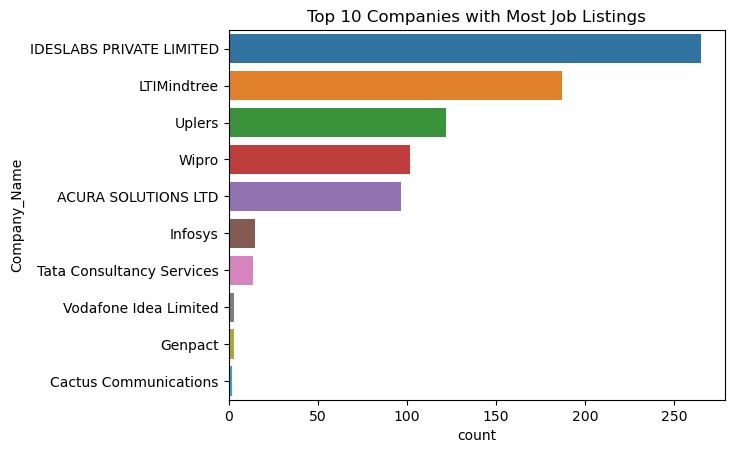

In [21]:
# Plotting the top 10 companies with the most job listings
group = df.groupby('Company_Name')['Total_applicants'].mean().sort_values(ascending=False)
sns.countplot(y=df['Company_Name'], order=df['Company_Name'].value_counts().index[:10]).set_title('Top 10 Companies with Most Job Listings')

### Top 10 Companies with Most Job Listings:
IDESLABS PRIVATE LIMITED has the most job listings, followed by LTMindtree and Upfers.

Text(0.5, 1.0, 'Top 10 Most Common Job Designations')

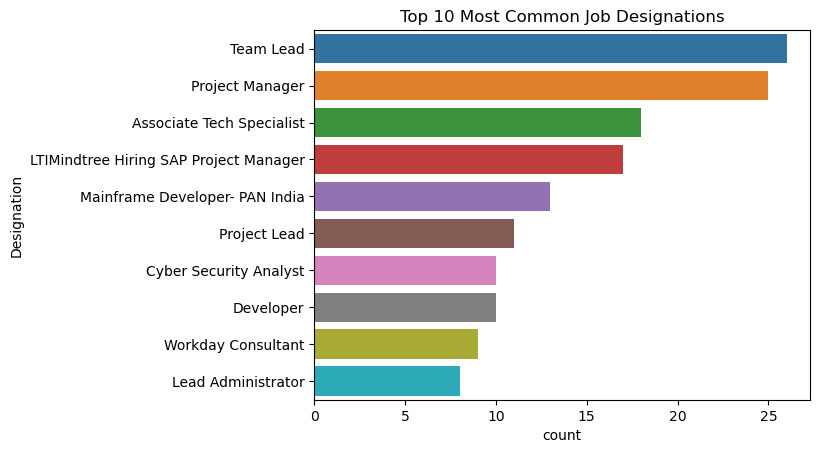

In [85]:
# Plotting the top 10 most common job designations
sns.countplot(y=df['Designation'], order=df['Designation'].value_counts().index[:10]).set_title('Top 10 Most Common Job Designations')

### Top 10 Most Common Job Designations:
The most common job designation from the second graph was Team Lead, followed by Project manager and Associate Tech Specialist.

Text(0.5, 1.0, 'Top 10 Locations with Most Job Listings')

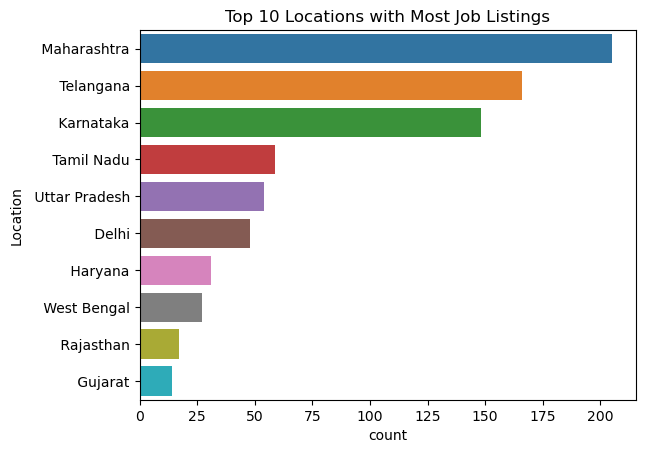

In [27]:
# Plotting the top 10 locations with the most job listings
sns.countplot(y=df['Location'], order=df['Location'].value_counts().index[:10]).set_title('Top 10 Locations with Most Job Listings')

### Top 10 locations with Most Job Listings
Maharashtra Has the most job listings out of all locations in the LinkedIn data, with Telangana and Karnataka closest behind.


# Step 3: Assessing the fitness of the data
- The dataset was well-structured with no missing values. All columns in the dataset were relevant to the analysis, and there was no need for extensive cleaning or transformation.

## Checking for missing values:

In [7]:
#Check for any missing values:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
#There are no missing values

Series([], dtype: int64)


No missing values were found in the dataset

# Step 4 A - Plan

### Initial Expectations
I expected for the dataset to tailor to the IT sector the most in terms of most demanded and job postings avaliable.
### Reality
While analysis of the data showed favor to the IT sector it also highlighted other positions such as Real Estate. I was also expecting for a programming languange to be one of the highest demanded skills however for every graph, either UI or AI came out on top.
### Focus
I plan to set focus on th top industries that are highering the most applicants, and what skills these roles are looking for. I am also looking into the relationship between companies LinkedIn followers and there job applications.
### Target Audience
Recruiters and job seekers, or anyone who is looking to understand job market trends is the targeted audience. These would also be the people I am trying to convince and would benefit from my provided data analysis.
### Unintended Consequences
The graphs might inadvertently emphasize certain industries or skills over others. These small samples of the job market shouldnt be used to represent a complete picture of the current job market.

# Step 4 B - Visualizations for Questions

### Answering Question 1: What skills are most in demand for the top job designations

Text(0, 0.5, 'Number of Listings')

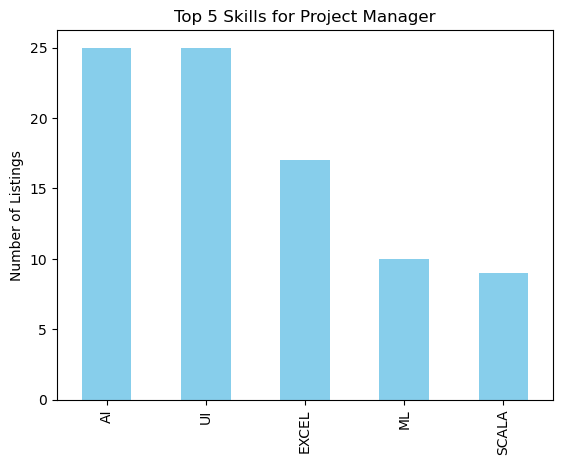

In [69]:
top = ['Project Manager', 'Team Lead', 'Associate Tech Specialist']
filterTop = df[df["Designation"].isin(top)]
skills = df.columns[10:]
skill_aggregate = filterTop.groupby('Designation')[skills].sum().transpose()

skill_aggregate['Project Manager'].sort_values(ascending=False).head(5).plot(kind='bar', color='skyblue')
plt.title('Top 5 Skills for Project Manager')
plt.ylabel('Number of Listings')

### Top 5 Skills for Project Managers:
The top skills are AI and UI.

Text(0, 0.5, 'Number of Listings')

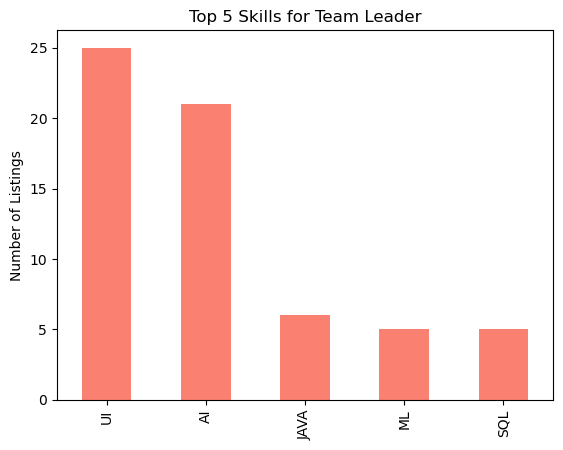

In [72]:
skill_aggregate['Team Lead'].sort_values(ascending=False).head(5).plot(kind='bar', color='salmon')
plt.title('Top 5 Skills for Team Leader')
plt.ylabel('Number of Listings')

### Top 5 Skills for Team Leaders
The top skill here are UI with AI second.

Text(0, 0.5, 'Number of Listings')

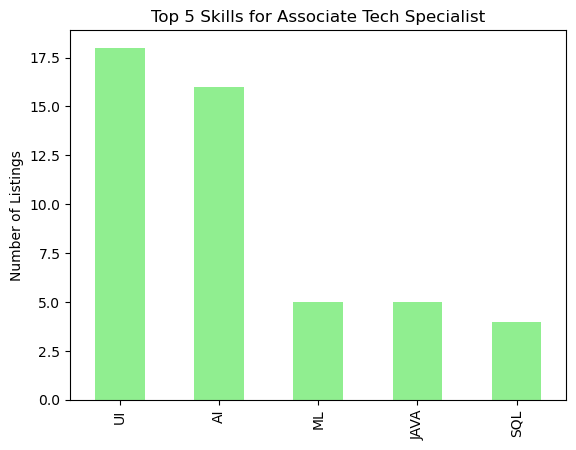

In [75]:
skill_aggregate['Associate Tech Specialist'].sort_values(ascending=False).head(5).plot(kind='bar', color='lightgreen')
plt.title('Top 5 Skills for Associate Tech Specialist')
plt.ylabel('Number of Listings')

### Top 5 Skills for Associate Tech Specialist:
The top skills for this job are again UI and AI.

## Data Correlation 
### Answering Question 2: How does the number of LinkedIn followers correlate with the number of job listings or applicants for a company?


Text(0.5, 1.0, 'Correlation between LinkedIn Followers and Total Applicants')

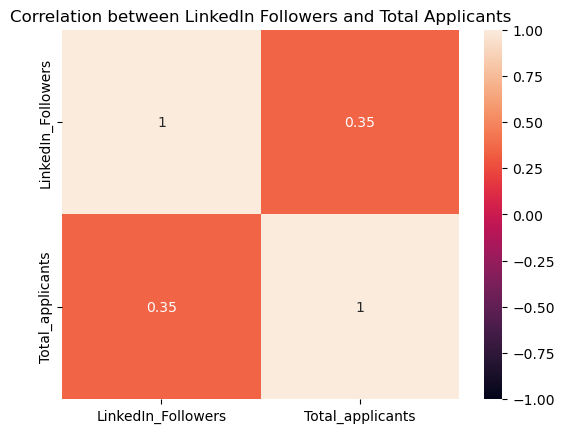

In [31]:
correlation = df[['LinkedIn_Followers', 'Total_applicants']].corr()
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1).set_title("Correlation between LinkedIn Followers and Total Applicants")

### Heatmap correlation between LinkedIn_followers and Total_applications.
- Since the value is close to zero, it shows that there is a weak linear relationship between the number of linkedin followers a company has and the number of applications they recieve.

## Answering Question 3: Which industries have the highest demand for jobs?


Text(0.5, 1.0, 'Top 4 Industries with Most Job Listings')

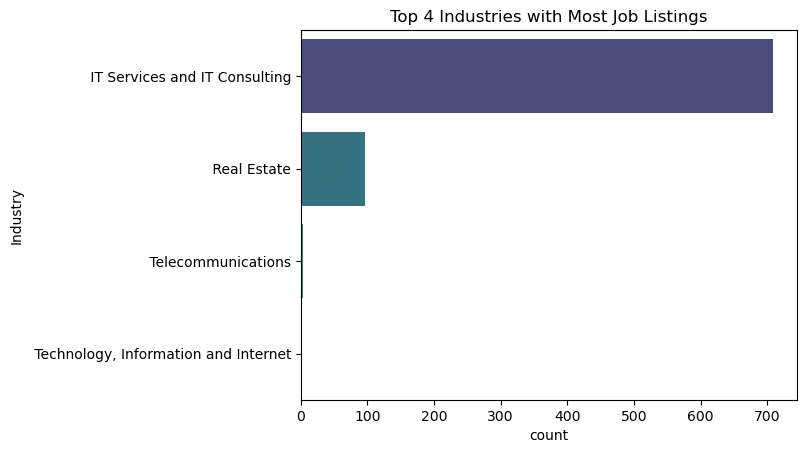

In [84]:
sns.barplot(x=df['Industry'].value_counts(), y=df['Industry'].value_counts().index[:4], palette='viridis')
plt.title('Top 4 Industries with Most Job Listings')

The Bar plot above shows the top 4 industries with the most job offerings. The most job offerings come from the IT Services and IT Consulting Industry. No other Industries come close.
- This shows that there is a high demand for jobs in this sector.

## Outliers:
Looking into outliers in specific columns such as Total Applicants and LinkedIn Followers

Text(0.5, 1.0, 'Histogram of Total Applicants')

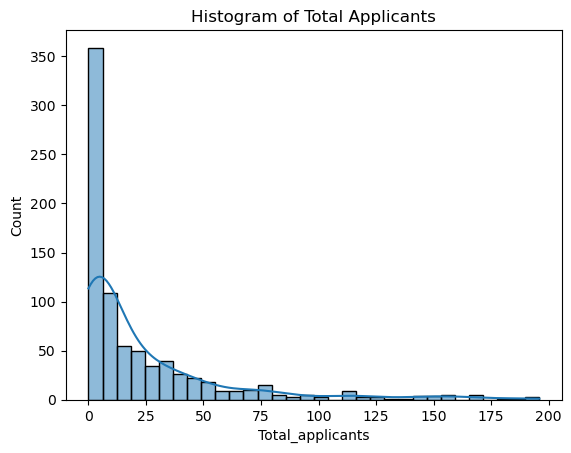

In [49]:
# Histogram for Total_applicants:
sns.histplot(df['Total_applicants'], kde=True).set_title('Histogram of Total Applicants')

### Total_applicants Outliers:
- The Histogram shows a right skew distribution, which shows there are a few extreamely high values in the column. This shows that there are some jobs that recieve a much higher applicant pool than others.

Text(0.5, 1.0, 'Histogram of LinkedIn Followers')

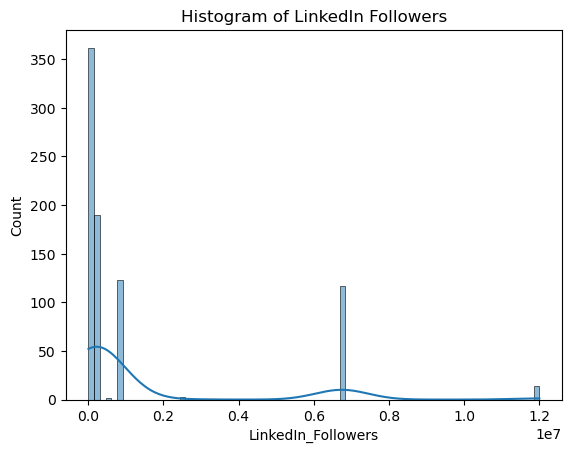

In [50]:
# Histogram for LinkedIn_Followers: 
sns.histplot(df['LinkedIn_Followers'], kde=True).set_title('Histogram of LinkedIn Followers')

### LinkedIn_Followers Outliers:
- LinkedIn's Histogram is also right skewed showing that there are some compaines with a much higher amount of followers than others.

# Final Deliverables and Submission Requirements

The chosen graphs provided insights into the LinkedIn Data job market. The analysis showed that certain skills, like UI and AI, are crucial across multiple job roles. While there was an expectation of a correlation between LinkedIn followers and applicants, the data did not show a strong relationship.

I chose a simple visualization approach with primarily bar graphs to help represent my analysis.
I had failed attempts with some of the bar graphs representing too much data and making it unreadable, I fixed these issues by only showing the top most relevant data.

I showed my data to one classmate and the feedback I got was also that my data was attempting to represent too much, making it difficult to understand. This was when I decided to take a new approach and refine my visualizations, specifically my bar graphs, and have them only show the top relevant data.


#### Possible Revisions
In future iterations, it might be helpful to explore factors like job levels, classes, or look into more specific industries.Integrating external data sources, like company reviews or salary ranges from LinkedIn, would offer a more comprehensive analysis if there is avaliable data.

# Sources / References
Dataset: LinkedIn Tech Jobs
- https://www.kaggle.com/datasets/joebeachcapital/linkedin-jobs

Other
- Seaborn Documentation: https://seaborn.pydata.org/
- Geekforgeeks: https://www.geeksforgeeks.org/data-visualization-with-python-seaborn/#